# Project: The Movie Database (TMDb) data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> In this project, we will be analyzing data about movies. This data is collected from The Movie Database (TMDb) dataset. The dataset analyzed contains over 10,000 pieces of movie information. In particular, we will be interested in finding genres that are most popular and highly rated from year to year and also to know what characteristics or properties contribute to the generation of high revenue by the movies.



### Question(s) for Analysis
> 1. What are the most popular genres from year 1966 to year 2015?
> 2. Which movie genre is the most highly rated in each year?
> 3. What are the kinds of properties associated with high revenue movies?

In [1]:
# Importing the packages required by the project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast # ast stands for  Abstract Syntax Trees
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> In this section, we shall try to understand our dataset. After importing the data and loading it into a dataset, we shall inspect our data and figure out the strutcure of the dataset, any changes needed and hence make appropriate decisions to clean the data. 


### General Properties

> We are going to use a few commands to get/view the general properties of our dataframe:
    
> 1. head() - we will display the first five rows in our dataset. This helpts us to know wheter our data is text, numbers
floating point, are there special characters, etc.
> 2. shape - Determines the structure of our dataframe by finding out the number of rows and columns
> 3. info() - Display the General overview of our data. We can see all the column names, number of rows in each column,
as well as the data types.
> 4. describe() - We use this function to get a descriptive statistics summary of a given dataframe.
This includes mean, count, std deviation, percentiles, and min-max values of all the features.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head() # The head command lists the first five rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Also, instead of using the default index, we can use **id**.

In [4]:
# Set the index column to be 'id' instead of using the default index which increments by 1
df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> By using the **head()** method to display the first five rows, we notice that our not all columns are displayed in our dataset. We do not know how data looks like in other columns. 
We can use the **shape** property to know the number of rows and columns, after which we shall explore other columns.

In [5]:
# Display the structure of our dataframe i.e how many rows and columns exist
df.shape

(10866, 20)

> We now know that our dataset contains 20 columns and 10866 rows.
We can use the **info()** method to list all the column names available, with thier respective datatypes and the number of rows. So can can inspect if there are any problems with our dataset.

In [6]:
# Display the General overview of our data. We can see all the column names, number of rows in each column, 
# as well as the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [7]:
# get a descriptive statistics summary of a given dataframe
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

> We are now going to clean our data.

> Before deciding to either fill in data in missing rows or drop the rows, we shall first drop the columns that are not relevant for the questions set for our analysis.

In [8]:
# Drop columns: imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, runtime,
# release_date, budget_adj, revenue_adj, production_companies
df.drop(columns=['imdb_id', 'original_title', 'cast', 'director', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'budget_adj', 'revenue_adj', 'production_companies' ], inplace=True)
df.head()

,popularity,budget,revenue,genres,vote_count,vote_average,release_year
id,,,,,,,
135397,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
76341,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
262500,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2480,6.3,2015
140607,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
168259,9.335014,190000000,1506249360,Action|Crime|Thriller,2947,7.3,2015


In [9]:
df.shape

(10866, 7)

> Now our dataset has 7 columns.
We can use **info()** command to cheque if we have missing rows with missing data and if we hav the right datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 7 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 679.1+ KB


In [11]:
# Check if there are any missing/null values and get the total
df.isnull().sum()

popularity       0
budget           0
revenue          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

> By looking at the output of the **info()** and the **isnull()** methods above, we find out that:
> 1. The data types seem to be fine
> 2. genres column has missing values, i.e 23 three rows and the rest are fine



> So, next we are going to drop missing rows from the **genres** column. Given the size of the dataset, the best solution is to drop the missing rows since they are only 23

In [12]:
# drop rows with any null values in the dataset
df.dropna(inplace=True)


In [13]:
# Check if any columns in the dataset still has null values
df.isnull().sum().any()

False

>Since the reuslt of the above code is **False**, there are no longer any rows with null values.

>Son our shape, in terms of the number of rows, must also have changed as shown below:

In [14]:
df.shape

(10843, 7)

> Before we can proceed to EDA, let us first investigate whether there are any duplicated rows in our dataset.
To do this, we shall use the **duplicated()** and **sum()** methods.

In [15]:
# Find the sum of duplicated rows
df.duplicated().sum()

1

> From our analysis, we realize that we have 1 duplicated row. So we must dedupe our data by droping the duplicated.
to do this, we are going to use the **drop_duplicates** command as shown below:


In [16]:
# Drop any duplicated rows
df.drop_duplicates(inplace=True)

In [17]:
# Print the number of duplicates again to comfirm dedupe - result should be 0
df.duplicated().sum()

0

>Now, our data is all set for the Exploratory Data Analysis (EDA)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the most popular genres from year 1966 to year 2015?

> We are going to use a box plot to further investigate the popularity column. We are choosing a box plot because 
from it, we can easily see how the data is distributed on the scale and we are able to detect any outliers

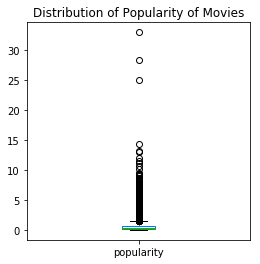

In [18]:
# Using a box plot to show how the popularity is distributed so as to detect any outliers
fig, ax = plt.subplots(figsize=(4,4))
df['popularity'].plot(kind='box', title='Distribution of Popularity of Movies', ax=ax);

>From the box plot above, we can detect outliers in our data. From some where above 15, the results popularity results do not seem to be normal.

>So we are going drop any Popularity values above 15

In [19]:
# Subset the dataset so that it contains only popularity values above 15 and assign it to a new dataset named 'df_pop'
df_pop = df[df['popularity']<15]

> Now let us investigate the **genres** column

In [20]:
# Finding the number of unique genres
df_pop.genres.nunique()

2039

In [21]:
# Display some of the unique groups of genres
df_pop.genres.unique()

array(['Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy',
       'Action|Crime|Thriller', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

> From the above two cells, we see that there are a combination of several generes to which movies belong.

In [22]:
# Have a picture of the value counts for the genres combinations/groups
# We are looking at the first 20
df_pop.genres.value_counts().head(20)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

In [23]:
# Have a picture of the value counts for the genres combinations/groups
# We are looking at the last 20
df_pop.genres.value_counts().tail(20)

Romance|Action|Adventure|Western|Drama           1
Fantasy|Drama|Comedy|Romance|Foreign             1
Horror|Comedy|Action|Science Fiction|Thriller    1
TV Movie|Drama|Comedy|Music|Romance              1
Comedy|Romance|Music                             1
Foreign|Documentary                              1
Adventure|Action|Thriller|Mystery                1
Comedy|Animation|Family|Fantasy                  1
Action|Adventure|Thriller|Drama                  1
History|War|Action|Drama                         1
Adventure|Horror|Thriller|Mystery                1
Music|Action|Adventure|Comedy|Family             1
Drama|Action|Adventure                           1
Romance|Science Fiction|Thriller                 1
Drama|Thriller|Crime|Mystery|Romance             1
Animation|Adventure|Family|Comedy                1
Comedy|Action|Science Fiction                    1
Family|Adventure|Comedy|Music|Fantasy            1
Drama|Action|Science Fiction                     1
Comedy|Thriller|Crime|Drama    

>For the case of clarity in our comaprisons, we shall concentrate on only five genres, that is, Adventure, Science Fiction, Action, Horror and Comedy.

> So, we are going to concentrate on only those containing the 5 selected genres.

> We shall first create dataframes for each selecte genre, then we sahll use describe() function to get a descriptive statistics summary of the pipularity of movies for each genre. Then we shall  use histograms because we are able to quickly
visualize the distribution of genres for each type.

In [24]:
# Creating different dataframes for each selected genre
df_Adv = df_pop[df_pop.genres.str.contains("Adventure")]
df_Sci=  df_pop[df_pop.genres.str.contains("Science Fiction")]
df_Hor = df_pop[df_pop.genres.str.contains("Horror")]
df_Act = df_pop[df_pop.genres.str.contains("Action")]
df_Com = df_pop[df_pop.genres.str.contains("Comedy")]

In [25]:
# stats for popularity of movies which are part of Adventure genre
df_Adv['popularity'].describe()

count    1468.000000
mean        1.097793
std         1.511393
min         0.001531
25%         0.291452
50%         0.559897
75%         1.254170
max        14.311205
Name: popularity, dtype: float64

In [26]:
# stats for popularity of movies which are part of 'Science Fiction' genre
df_Sci['popularity'].describe()

count    1226.000000
mean        0.933562
std         1.451264
min         0.001983
25%         0.230186
50%         0.437955
75%         0.969252
max        14.311205
Name: popularity, dtype: float64

In [27]:
# stats for popularity of movies which are part of Horror genre
df_Hor['popularity'].describe()

count    1637.000000
mean        0.465357
std         0.535400
min         0.001349
25%         0.177133
50%         0.321891
75%         0.542611
max         8.411577
Name: popularity, dtype: float64

In [28]:
# stats for popularity of movies which are part of Action genre
df_Act['popularity'].describe()

count    2382.000000
mean        0.901273
std         1.268168
min         0.001662
25%         0.265119
50%         0.469711
75%         1.000415
max        14.311205
Name: popularity, dtype: float64

In [29]:
# stats for popularity of movies which are part of Comedy genre
df_Com['popularity'].describe()

count    3793.000000
mean        0.592607
std         0.682091
min         0.000188
25%         0.210654
50%         0.388667
75%         0.713697
max         8.691294
Name: popularity, dtype: float64

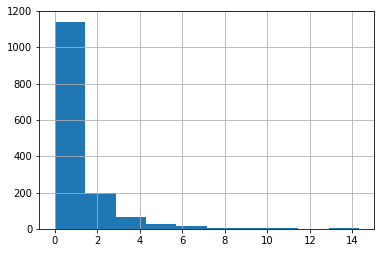

In [30]:
# Distribution of the Popularity of movies that are part of the Adventure genre 
df_Adv.popularity.hist();

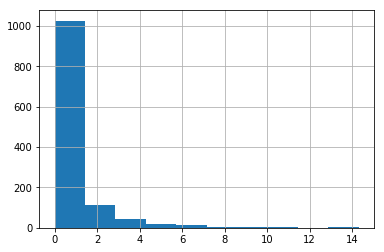

In [31]:
# Distribution of the Popularity of movies that are part of the 'Science Fiction' genre 
df_Sci.popularity.hist();

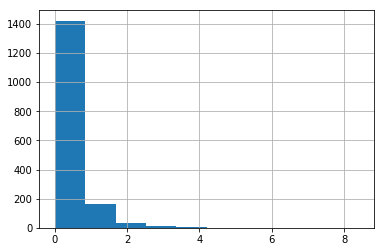

In [32]:
# Distribution of the Popularity of movies that are part of the Horror genre 
df_Hor.popularity.hist();

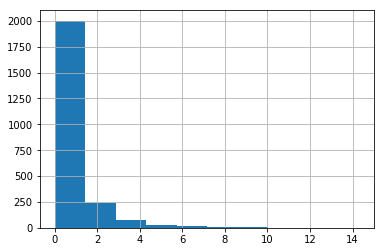

In [33]:
# Distribution of the Popularity of movies that are part of the Action genre 
df_Act.popularity.hist();

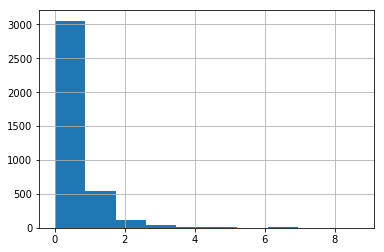

In [34]:
# Distribution of the Popularity of movies that are part of the Comedy genre 
df_Com.popularity.hist();

### Research Question 2: Which movie genre is the most highly rated in each year?

> The genre column a combination of string genre names separated by the pipe character.
For us to do thorough exploration, we shall divide the movies into different groups according to genres. 
Each movie can belong to multiple genres, therefore, the easiest way to analyze the genre information is to include a movie in the group for
each genre, even if a movie is included in more than one dataframe.

> There are 2039 number of unique genres as already seen in Question 2 section. To create separate dataframes, we shall first find each individual genre
that exists in the dataset.

> We do this first by creating an array using NumPy out of the genre column

In [35]:
# Creating a NumPy array for genres
array_genres = df.genres.values
array_genres = array_genres.astype('U')
array_genres.dtype

dtype('<U51')

> Our array was successfully created. Now we split the elements of the array_genres by the pipe(|) delimeter and then 
store the individual genres in a new array

In [36]:
# Spliting the elements of an array by the pipe delimeter
# then store the individual genres in a new array called 'array_genres_splitted'
array_genres_splitted = np.core.defchararray.split(a = array_genres, sep = '|')
print(array_genres_splitted.dtype)
print(array_genres_splitted)

object
[list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Adventure', 'Science Fiction', 'Thriller']) ...
 list(['Mystery', 'Comedy']) list(['Action', 'Comedy']) list(['Horror'])]


> Now, we are going to get the total number of words and the maximum number of words that represent genre tags in all the
dataframe genre values. by doing this, we are able to initialize a property sized array so as to better utilize NumPy's efficiency.

In [37]:
# Get the total number and max number of words representing the genre tags
words_total = 0
length_max = 0

for i, r in enumerate(array_genres_splitted):
    for word in array_genres_splitted[i]:
        words_total += 1
        if len(word) > length_max:
            length_max = len(word)

print('Total Words:' + str(words_total))
print('Maximum Words:' + str(length_max))

Total Words:26955
Maximum Words:15


> We are now going to initialize an array with 1 by total number of words reopresenting genres using NumPy

In [38]:
# Initialize the array with 1Xtotal number of words representing genres
genres_array_combined = np.empty((1, words_total), dtype = ('U' + str(length_max)))
genres_array_combined.shape

(1, 26955)

In [39]:
# Set each element in the array
counter = 0
for i, r in enumerate(array_genres_splitted):
    list_of_rows = ast.literal_eval(str(r))
    
    for word in list_of_rows:
        genres_array_combined[0, counter] = word
        counter = counter + 1
        
print(genres_array_combined)        

[['Action' 'Adventure' 'Science Fiction' ... 'Action' 'Comedy' 'Horror']]


> Next, we are going to find each individual genre in the combined array

In [40]:
# Find unique individual genres
unique_genres = np.unique(genres_array_combined)
unique_genres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

> At this moment, we have a list of all he unique genres in our dataset and hence we are going to create a new dataframe for each genre

In [41]:
# Creating new dataframes for each individual unique genre
df_Action = df.loc[df['genres'].str.contains('Action')]
df_Adventure = df.loc[df['genres'].str.contains('Adventure')]
df_Animation = df.loc[df['genres'].str.contains('Animation')]
df_Comedy = df.loc[df['genres'].str.contains('Comedy')]
df_Crime = df.loc[df['genres'].str.contains('Crime')]
df_Documentary = df.loc[df['genres'].str.contains('Documentary')]
df_Drama = df.loc[df['genres'].str.contains('Drama')]
df_Family = df.loc[df['genres'].str.contains('Family')]
df_Fantasy = df.loc[df['genres'].str.contains('Fantasy')]
df_Foreign = df.loc[df['genres'].str.contains('Foreign')]
df_History = df.loc[df['genres'].str.contains('History')]
df_Horror = df.loc[df['genres'].str.contains('Horror')]
df_Music = df.loc[df['genres'].str.contains('Music')]
df_Mystery = df.loc[df['genres'].str.contains('Mystery')]
df_Romance = df.loc[df['genres'].str.contains('Romance')]
df_Science_Fiction = df.loc[df['genres'].str.contains('Science Fiction')]
df_TV_Movie = df.loc[df['genres'].str.contains('TV Movie')]
df_Thriller = df.loc[df['genres'].str.contains('Thriller')]
df_War = df.loc[df['genres'].str.contains('War')]
df_Western = df.loc[df['genres'].str.contains('Western')]

> We are now going to find out the number of each genre in our dataset. we shall get the length of the index in each dataframe
and then sort the values in descending order

In [42]:
# Counting the number of times that each individual genre exists in the dataset, and display it along
# with the genre name/tag
count_genre = []
for g in unique_genres:
    t = "df_" + g
    t = t.replace(" ", "_")
    n = len(eval(t + '.index'))
    
    count_genre.append([t[2:], n])
    
count_genre.sort(key = lambda y:y[1], reverse = True)

for i, g in enumerate(count_genre):
    count_genre[i] = [g[0].title().replace("_", " "), g[1]]
    
print(count_genre)    
    

[[' Drama', 4760], [' Comedy', 3793], [' Thriller', 2907], [' Action', 2384], [' Romance', 1712], [' Horror', 1637], [' Adventure', 1471], [' Crime', 1354], [' Family', 1231], [' Science Fiction', 1229], [' Fantasy', 916], [' Mystery', 810], [' Animation', 699], [' Documentary', 520], [' Music', 408], [' History', 334], [' War', 270], [' Foreign', 188], [' Tv Movie', 167], [' Western', 165]]


>We are going to visualize the above information using bar graph. We are choosing a bar graph because with it, we can easily compare each genre by looking at the height of the bars.

>On top of that, we shall place the values on top of the respective bars to be exact in our comparisons

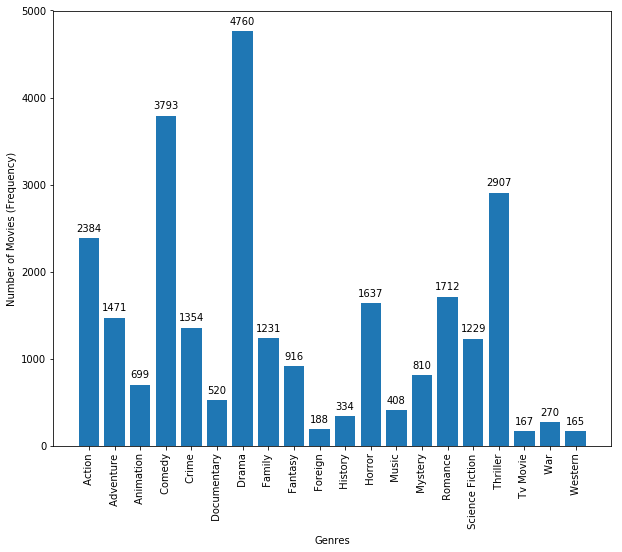

In [43]:
# Using a vertical bar plot to visualize the number of times that each individual genre exists in the dataset
plt.figure(figsize=(10, 8))
x, y = [*zip(*count_genre)]
graph = plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel("Number of Movies (Frequency)")

# Have values placed above the bars
for p in graph.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center',  xytext = (0, 10), textcoords = 'offset points')

plt.show()

### Research Question 3: What are the kinds of properties associated with high revenue movies?

>First of all, we are going to check if there exists a relationship between revenue and the other columns/properties
To do this, we are going to use scatter plots. 

> We are choosing scatter plots because with them, we can easily visualize if there exists a relationship between the two variables, by looking at how dots are distributed. However, we shall also use the corr() function to be exact in our correlations results.

> Let us begin with popularity.
We are using the **df_pop** dataset which has no outliers 

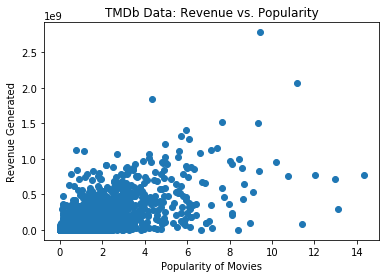

In [44]:
# Plot Revenue vs Popularity
plt.scatter(x=df_pop.popularity, y=df_pop.revenue)
plt.xlabel("Popularity of Movies")
plt.ylabel("Revenue Generated")
plt.title("TMDb Data: Revenue vs. Popularity");

> From the scatter plot, we realize that there seems to be a Moderate positive correlation between Revenue and Popularity.
This can be further comfirmed by finding the correlation coefficient as shown below

In [45]:
# Find the correlation coefficient for between Revenue and Popularity
df_pop.revenue.corr(df_pop.popularity)

0.6944643745005203

> For the rest of the columns, we are going to use the **df** dataset to draw our scatter plots

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 135397 to 22293
Data columns (total 7 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
genres          10842 non-null object
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 677.6+ KB


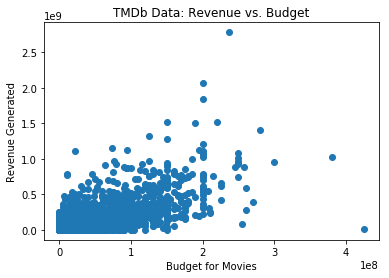

In [47]:
# Plot Revenue vs Budget
plt.scatter(x=df.budget, y=df.revenue)
plt.xlabel("Budget for Movies")
plt.ylabel("Revenue Generated")
plt.title("TMDb Data: Revenue vs. Budget");

In [48]:
# Find the correlation coefficient for between Revenue and Budget
df.revenue.corr(df.budget)

0.7348511310076252

> Both the scatter plot and the correlation coefficient indicate a High Positive correlation between the Budget and the Revenue

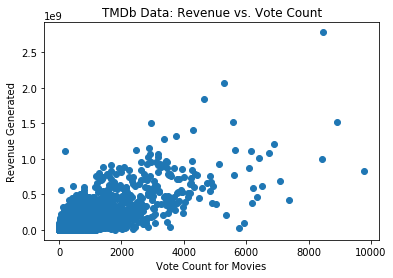

In [49]:
# Plot Revenue vs Vote Count
plt.scatter(x=df.vote_count, y=df.revenue)
plt.xlabel("Vote Count for Movies")
plt.ylabel("Revenue Generated")
plt.title("TMDb Data: Revenue vs. Vote Count");

In [50]:
# Find the correlation coefficient for between Revenue and Vote Count
df.revenue.corr(df.vote_count)

0.7911223682826337

Both the scatter plot and the correlation coefficient indicate a High Positive correlation between the Vote Count and the Revenue

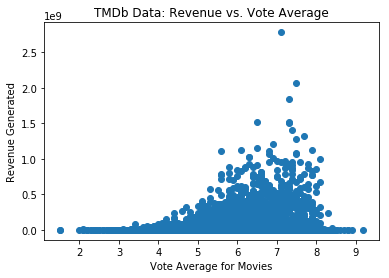

In [51]:
# Plot Revenue vs Vote Average
plt.scatter(x=df.vote_average, y=df.revenue)
plt.xlabel("Vote Average for Movies")
plt.ylabel("Revenue Generated")
plt.title("TMDb Data: Revenue vs. Vote Average");

In [52]:
# Find the correlation coefficient for between Revenue and Vote Average
df.revenue.corr(df.vote_average)

0.17325425821837995

>Both the scatter plot and the correlation coefficient indicate a Negligibel or No correlation between the Vote Average and the Revenue.

>The interpleatation of the results if obtained using the scale below:
    
            **Size of Correlation                           Interpretation**
            0.90 to 1.00 (-0.90 t0 -1.00)                 Very high positive (negative) correlation
            0.70 to 0.90 (-0.70 t0 -0.90)                 High positive (negative) correlation
            0.50 to 0.70 (-0.50 t0 -0.70)                 Moderate positive (negative) correlation
            0.30 to 0.50 (-0.30 t0 -0.50)                 Low positive (negative) correlation
            0.00 to 0.30 (-0.00 t0 -0.30)                 Negligible correlation

In [53]:
# Use a qyery function to get values/rows with high revenue (whose value is greater than the mean revenue)
df_high_revenue = df.query('revenue > revenue.mean()')

# Get a descriptive statistics summary of dataset rows with high revenue
df_high_revenue.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,2169.000000,2.169000e+03,2.169000e+03,2169.000000,2169.000000,2169.000000
mean,1.624907,5.203740e+07,1.838336e+08,814.924850,6.288843,2001.875058
std,1.784144,4.860672e+07,2.058552e+08,1060.316439,0.734341,10.675548
min,0.010335,0.000000e+00,3.994678e+07,10.000000,3.400000,1960.000000
25%,0.737768,1.800000e+07,6.646833e+07,192.000000,5.800000,1996.000000
50%,1.161942,3.800000e+07,1.130203e+08,422.000000,6.300000,2004.000000
75%,1.888746,7.000000e+07,2.139543e+08,971.000000,6.800000,2010.000000
max,32.985763,3.800000e+08,2.781506e+09,9767.000000,8.300000,2015.000000


<a id='conclusions'></a>
## Conclusions

Finally, from the analysis, we find that:

1. The most popular genres from year 1966 to year 2015 as per the selected genres are as arranged in the following order:
    a. comedy
    b. Action
    c. Horror
    d. Science Fiction
    e. Adventure

2. The movie genre which is the most highly rated in each year was found to be **Drama**. The List below shows the order from the highest to the lowest:
        1. Drama
        2. Comedy
        3. Thriller
        4. Action
        5. Romance
        6. Horror
        7. Adventure
        8. Crime
        9. Family
        10. Science Fiction
        11. Fantasy
        12. Mystery
        13. Animation
        14. Documentary
        15. Music
        16. History
        17. War
        18. Foreign
        19. Tv Movie
        20. Western

3. The kinds of properties associated with high revenue movies include; popularity, budget, revenue and vote_count.
It was found out that these properties have a positive correction with revenue and they determine the high revenue
that movies generate. However, **vote_average** was found to have no correlation with Revenue and hence it is not associated with high revenue.

Further analysis and exploration is need to find out if:
1. A higher movies budget is associated with higher average vote
2. A genre is associated with high revenue

Limitations in the study included:
1. Links provided to read more about the data set were NOT working hence I lacked details for better understanding of the data
2. The conclusions are limited by the data quality. There are lots of missing data in some columns.


### Bibliography
online documentations of pandas, numpy, and matplotlib
McKinney, W. (2018). Python for Data Analysis: Data Wrangling With pandas, numpy, and ipython (2nd ed.). Sebastopol, CA: OReilly Media

https://stackoverflow.com

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0